In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import copy
import seaborn as sns
from PIL import Image
import json
from tqdm import tqdm
from pycocotools.coco import COCO


In [131]:
ls

'Untitled copy.ipynb'     new_train.json       test/       train.json
 Untitled.ipynb           new_val.json         test.json
 metric_challenge.ipynb   submission_lhb.csv   train/


In [5]:
#############
##submission#
#############
'''
[
    [image_id, file_name 1, confidence_score, category1, x_min, x_max, y_min, y_max , cnt_box], 
    [image_id, file_name 1, confidence_score2, category2, x_min2, x_max2, y_min2, y_max2, cnt_box], 
    [image_id, file_name 1, confidence_score3, category3, x_min3, x_max3, y_min3, y_max3, cnt_box], 
    [image_id, file_name 1, confidence_score4, category4, x_min4, x_max4, y_min4, y_max4, cnt_box], 
    ...
    
]
'''
dataset_path = '../../../../dataset/'

PRED_CSV = "../work_dirs/HTC_PyramidVisionTransformerV2_SoftNMS/submission.csv"
#PRED_CSV = "../work_dirs/submission_lhb.csv"
pred_df = pd.read_csv(PRED_CSV)

file_names = pred_df['image_id'].values.tolist()
bboxes = pred_df['PredictionString'].values.tolist()
for i, bbox in enumerate(bboxes):
    if isinstance(bbox, float):
        print(f'{file_names[i]} empty box')
category = []
file_name2 = [] 
confidence_score = []
bbox2= []
id = []
cnt_box = []
for file_name, bbox in tqdm(zip(file_names, bboxes)):
    boxes = np.array(str(bbox).split(' '))
    len_box = len(boxes) 
    if len_box % 6 == 1:
        boxes = boxes[:-1].reshape(-1, 6)
    elif len(box) % 6 == 0:
        boxes = boxes.reshape(-1, 6)
    else:
        raise Exception('error', 'invalid box count')
    len_box = len(boxes)
    for box in boxes:
        cnt_box.append(len_box)
        file_name2.append(file_name)
        id.append(file_name2[-1][-8:-4])
        category.append(box[0])
        confidence_score.append(box[1])
        bbox2.append([float(box[2]), float(box[4]), float(box[3]), float(box[5])])

annotations = pd.DataFrame({"image_id" : id,
                    "file_name":file_name2,
                    "confidence_score":confidence_score,
                    "category":category,
                    "bbox":bbox2,
                    "cnt_box":cnt_box
                           })



test/1528.jpg empty box


4871it [00:00, 6182.94it/s]


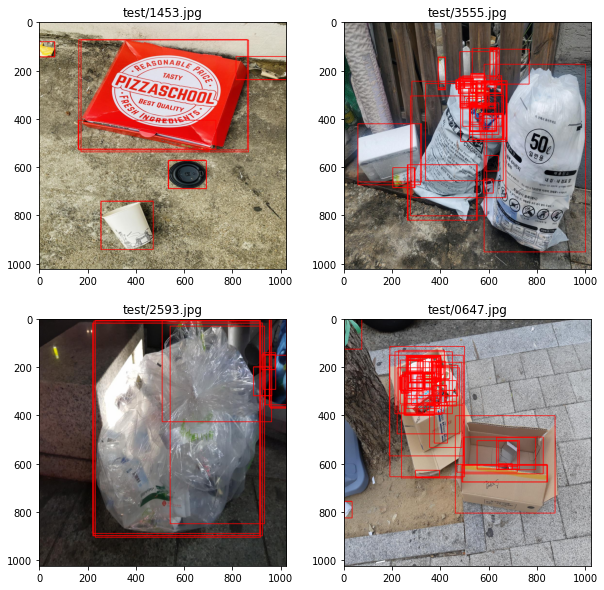

In [13]:
## 랜덤으로 4개 출력##
show_image = annotations.sample(4)
image_path = show_image.file_name.values.tolist()
fig = plt.figure(figsize=(10,10)) 
for i in range(4):
    image = cv2.imread(dataset_path + image_path[i],cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    boxes = annotations[annotations['file_name'] == image_path[i]]
    for box in boxes['bbox']:
        xmin, xmax, ymin, ymax = map(int, box)
        image=(cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2))
    plt.subplot(2,2,i+1).title.set_text(image_path[i])
    plt.imshow(image)



In [6]:
#############
###비교해볼거###
##submission#
#############


#PRED_CSV = "../work_dirs/HTC_PyramidVisionTransformerV2_SoftNMS/submission.csv"
PRED_CSV = "../work_dirs/submission_lhb.csv" #1등 csv
pred_df = pd.read_csv(PRED_CSV)

file_names = pred_df['image_id'].values.tolist()
bboxes = pred_df['PredictionString'].values.tolist()
for i, bbox in enumerate(bboxes):
    if isinstance(bbox, float):
        print(f'{file_names[i]} empty box')
category = []
file_name2 = [] 
confidence_score = []
bbox2= []
id = []
cnt_box = []
for file_name, bbox in tqdm(zip(file_names, bboxes)):
    boxes = np.array(str(bbox).split(' '))
    len_box = len(boxes) 
    if len_box % 6 == 1:
        boxes = boxes[:-1].reshape(-1, 6)
    elif len(box) % 6 == 0:
        boxes = boxes.reshape(-1, 6)
    else:
        raise Exception('error', 'invalid box count')
    len_box = len(boxes)
    for box in boxes:
        cnt_box.append(len_box)
        file_name2.append(file_name)
        id.append(file_name2[-1][-8:-4])
        category.append(box[0])
        confidence_score.append(box[1])
        bbox2.append([float(box[2]), float(box[4]), float(box[3]), float(box[5])])

annotations_2 = pd.DataFrame({"image_id" : id,
                    "file_name":file_name2,
                    "confidence_score":confidence_score,
                    "category":category,
                    "bbox":bbox2,
                    "cnt_box":cnt_box
                           })


test/1528.jpg empty box


4871it [00:00, 5289.35it/s]


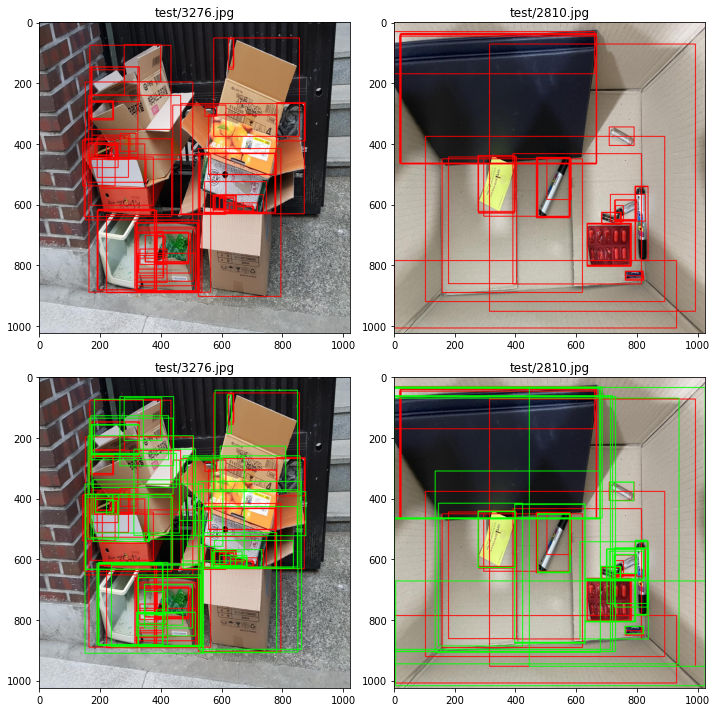

In [7]:
# 랜덤으로 2개씩 비교
# 초록색이 비교대상, 빨간색이 내 submission

show_image = annotations.sample(2)
image_path = show_image.file_name.values.tolist()
fig = plt.figure(figsize=(10,10)) 
for i in range(2):
    image = cv2.imread(dataset_path + image_path[i],cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    boxes = annotations[annotations['file_name'] == image_path[i]]
    for box in boxes['bbox']:
        xmin, xmax, ymin, ymax = map(int, box)
        image=(cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2))
    plt.subplot(2,2,i+1).title.set_text(image_path[i])
    plt.imshow(image)
    boxes2 = annotations_2[annotations_2['file_name'] == image_path[i]]
    for box in boxes2['bbox']:
        xmin, xmax, ymin, ymax = map(int, box)
        image=(cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2))
    plt.subplot(2,2,i+3).title.set_text(image_path[i])
    plt.imshow(image)
fig.tight_layout()
plt.show()


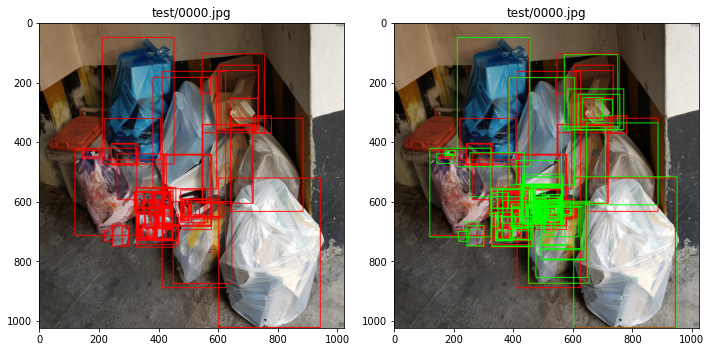

In [18]:
# image id로 비교하기 

image_id = '0000'
show_image = annotations.sample(2)
image_path = annotations[annotations["image_id"]==image_id].file_name.values.tolist()
fig = plt.figure(figsize=(10,10)) 
image = cv2.imread(dataset_path + image_path[0],cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
boxes = annotations[annotations['file_name'] == image_path[0]]
for box in boxes['bbox']:
    xmin, xmax, ymin, ymax = map(int, box)
    image=(cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2))
plt.subplot(1,2,1).title.set_text(image_path[i])
plt.imshow(image)
boxes2 = annotations_2[annotations_2['file_name'] == image_path[0]]
for box in boxes2['bbox']:
    xmin, xmax, ymin, ymax = map(int, box)
    image=(cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2))
plt.subplot(1,2,2).title.set_text(image_path[0])
plt.imshow(image)
fig.tight_layout()
plt.show()


In [135]:
annotations.cnt_box.head()#MaxDet 100으로 설정되어있어서 100개 이상 안찾음 이거 아니면 백만개 찾았을듯,,ㅠ

0    100
1    100
2    100
3    100
4    100
Name: cnt_box, dtype: int64

<AxesSubplot:xlabel='category', ylabel='count'>

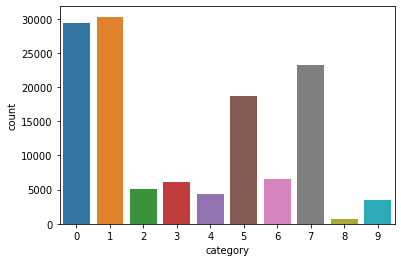

In [136]:
sns.countplot(data = annotations, x = 'category') # train dataset이랑 비슷한 분포 

In [149]:
annotations.image_id.value_counts().mean() # 평균 37개 박스 찾음

37.61671114760829